# NY_crimes_process

### Import numpy, pandas, matpltlib.pyplot

In [1]:
# Import numpy, pandas, matpltlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the data

In [4]:
!unrar x "/content/drive/MyDrive/data.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/data.rar

Extracting  NYPD_Complaint_Data_Historic.csv                               0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99%  OK

In [5]:
# Import the data
df = pd.read_csv('/content/NYPD_Complaint_Data_Historic.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,724718389,09/04/2014,17:25:00,09/04/2014,17:35:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1005945.0,188862.0,NaN,NaN,NaN,NaN,40.685041,-73.921777,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
1,191133903,10/12/2016,07:40:00,10/12/2016,07:45:00,121.0,10/12/2016,109,GRAND LARCENY,417.0,"LARCENY,GRAND FROM PERSON,PURS",COMPLETED,FELONY,STATEN ISLAND,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,947034.0,171375.0,UNKNOWN,BLACK,U,NaN,40.636991,-74.134093,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE HISPANIC,F
2,720151206,09/28/2012,13:30:00,09/28/2012,14:00:00,41.0,10/19/2012,109,GRAND LARCENY,413.0,"LARCENY,GRAND BY FALSE PROMISE",COMPLETED,FELONY,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1014179.0,239453.0,NaN,WHITE HISPANIC,M,NaN,40.823876,-73.891863,"(40.823876276, -73.891862968)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F
3,232242098,03/24/2015,15:45:00,NaN,NaN,46.0,03/24/2015,341,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1009041.0,247401.0,NaN,BLACK,M,NaN,40.845707,-73.910398,"(40.845707148, -73.910398033)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F
4,708078702,05/20/2017,04:02:00,05/20/2017,04:09:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1031779.0,217663.0,25-44,WHITE HISPANIC,M,NaN,40.763992,-73.828426,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,NaN,25-44,BLACK,M


### Data Exploration & Data Modeling 

In [6]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [7]:
df.shape

(6983207, 35)

In [8]:
df.VIC_SEX.value_counts()

F    2733665
M    2288821
E    1119264
D     841146
U          4
Name: VIC_SEX, dtype: int64

In [9]:
df.VIC_SEX.value_counts()

F    2733665
M    2288821
E    1119264
D     841146
U          4
Name: VIC_SEX, dtype: int64

In [10]:
columns_remove = ['CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HADEVELOPT', 'HOUSING_PSA', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'RPT_DT', 'STATION_NAME', 'TRANSIT_DISTRICT', 'X_COORD_CD','Y_COORD_CD', 'Lat_Lon']
df = df.drop(columns_remove, axis=1)

In [11]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

### Time

In [12]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
df.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

In [13]:
df['CMPLNT_FR_DT_TM'] = df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM']
df['CMPLNT_FR_DT_TM']

0          09/04/2014 17:25:00
1          10/12/2016 07:40:00
2          09/28/2012 13:30:00
3          03/24/2015 15:45:00
4          05/20/2017 04:02:00
                  ...         
6983202    09/12/2014 17:50:00
6983203    12/20/2012 13:30:00
6983204    04/04/2013 13:00:00
6983205    09/09/2015 13:00:00
6983206    08/19/2012 01:00:00
Name: CMPLNT_FR_DT_TM, Length: 6982505, dtype: object

In [14]:
df['CMPLNT_FR_DT_TM'] = pd.to_datetime(df['CMPLNT_FR_DT_TM'], infer_datetime_format=True,errors = 'coerce')

In [15]:
df['CMPLNT_FR_YEAR'] = df['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
df['CMPLNT_FR_MONTH'] = df['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
df['CMPLNT_FR_DAY'] = df['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
df['CMPLNT_FR_HOUR'] = df['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0]))

In [16]:
df['CMPLNT_FR_YEAR']

0          2014
1          2016
2          2012
3          2015
4          2017
           ... 
6983202    2014
6983203    2012
6983204    2013
6983205    2015
6983206    2012
Name: CMPLNT_FR_YEAR, Length: 6982505, dtype: int64

In [17]:
df['CMPLNT_FR_MONTH']

0           9
1          10
2           9
3           3
4           5
           ..
6983202     9
6983203    12
6983204     4
6983205     9
6983206     8
Name: CMPLNT_FR_MONTH, Length: 6982505, dtype: int64

In [18]:
df.CMPLNT_FR_DAY

0           4
1          12
2          28
3          24
4          20
           ..
6983202    12
6983203    20
6983204     4
6983205     9
6983206    19
Name: CMPLNT_FR_DAY, Length: 6982505, dtype: int64

In [19]:
df['CMPLNT_FR_YEAR'].unique()

array([2014, 2016, 2012, 2015, 2017, 2011, 2007, 2006, 2013, 2018, 2010,
       2005, 2009, 2008, 1991, 1974, 2003, 2004, 1950, 1015, 2002, 1994,
       1985, 2001, 1978, 1993, 1967, 1027, 1989, 1992, 1999, 1990, 1995,
       2000, 1972, 1980, 1998, 1957, 1982, 1930, 1971, 1016, 1986, 1996,
       1997, 1979, 1913, 1987, 1916, 1017, 1915, 1976, 1910, 1975, 1988,
       1966, 1955, 1969, 1977, 1906, 1920, 1968, 1984, 1960, 1908, 1922,
       1940, 1900, 1981, 1965, 1905, 1970, 1929, 1983, 1911, 1909, 1962,
       1941, 1954, 1961, 1948, 1956, 1973, 1938, 1959, 1945, 1964, 1946,
       1919, 1026, 1019, 1029, 1928, 1918, 1018, 1028, 1951, 1912, 1025,
       2019, 1949, 1914, 1917, 1947, 1958, 1942])

In [20]:
df['CMPLNT_FR_YEAR'].nunique()

106

In [21]:
l=list(df['CMPLNT_FR_YEAR'].unique())
a= df.shape[0]

In [22]:
for year in l :
    print('number of rows belong to the year ',year,' : ', df[df['CMPLNT_FR_YEAR']==year]['CMPLNT_FR_YEAR'].count())

number of rows belong to the year  2014  :  492316
number of rows belong to the year  2016  :  478765
number of rows belong to the year  2012  :  504945
number of rows belong to the year  2015  :  479009
number of rows belong to the year  2017  :  469070
number of rows belong to the year  2011  :  498818
number of rows belong to the year  2007  :  535424
number of rows belong to the year  2006  :  529126
number of rows belong to the year  2013  :  496063
number of rows belong to the year  2018  :  477513
number of rows belong to the year  2010  :  510328
number of rows belong to the year  2005  :  10806
number of rows belong to the year  2009  :  511217
number of rows belong to the year  2008  :  528907
number of rows belong to the year  1991  :  54
number of rows belong to the year  1974  :  19
number of rows belong to the year  2003  :  1624
number of rows belong to the year  2004  :  2175
number of rows belong to the year  1950  :  3
number of rows belong to the year  1015  :  9
num

In [23]:
df[df['CMPLNT_FR_YEAR']==2006].shape

(529126, 28)

In [24]:
df[df['CMPLNT_FR_YEAR']==2007].shape

(535424, 28)

In [25]:
df[df['CMPLNT_FR_YEAR']==2005].shape

(10806, 28)

In [26]:
df[df['CMPLNT_FR_YEAR']==2004].shape

(2175, 28)

In [27]:
df.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_TM,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
0,724718389,09/04/2014,17:25:00,81.0,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,40.685041,-73.921777,PATROL BORO BKLYN NORTH,25-44,WHITE,F,2014-09-04 17:25:00,2014,9,4,17
1,191133903,10/12/2016,07:40:00,121.0,109,GRAND LARCENY,417.0,"LARCENY,GRAND FROM PERSON,PURS",COMPLETED,FELONY,STATEN ISLAND,STREET,N.Y. POLICE DEPT,0.0,UNKNOWN,BLACK,U,40.636991,-74.134093,PATROL BORO STATEN ISLAND,45-64,WHITE HISPANIC,F,2016-10-12 07:40:00,2016,10,12,7
2,720151206,09/28/2012,13:30:00,41.0,109,GRAND LARCENY,413.0,"LARCENY,GRAND BY FALSE PROMISE",COMPLETED,FELONY,BRONX,STREET,N.Y. POLICE DEPT,0.0,NaN,WHITE HISPANIC,M,40.823876,-73.891863,PATROL BORO BRONX,45-64,WHITE HISPANIC,F,2012-09-28 13:30:00,2012,9,28,13
3,232242098,03/24/2015,15:45:00,46.0,341,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,0.0,NaN,BLACK,M,40.845707,-73.910398,PATROL BORO BRONX,<18,WHITE HISPANIC,F,2015-03-24 15:45:00,2015,3,24,15
4,708078702,05/20/2017,04:02:00,109.0,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,0.0,25-44,WHITE HISPANIC,M,40.763992,-73.828426,PATROL BORO QUEENS NORTH,25-44,BLACK,M,2017-05-20 04:02:00,2017,5,20,4


In [28]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
df.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

### Gender

In [29]:
df.replace('UNKNOWN', np.NaN, inplace=True)
df.replace('E', np.NaN, inplace=True)
df.replace('D', np.NaN, inplace=True)
df.replace('U', np.NaN, inplace=True)

In [30]:
a=df.shape[0]

In [31]:
print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

df.dropna(axis=0, inplace=True)
print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))
print('percentage of data removed: ',(a-3546952)/a*100,'%')

Number of rows before removing rows with missing values: 6982505
Number of rows after removing rows with missing values: 1165335
percentage of data removed:  49.202299174866326 %


In [32]:
print('percentage of data removed: ',((6982505-a)/6982505)*100,'%')

percentage of data removed:  0.0 %


### we will start working from the year : 2006

In [33]:
df[df['CMPLNT_FR_YEAR']==2007].shape

(54257, 28)

In [34]:
df[df['CMPLNT_FR_YEAR']==2006].shape

(57673, 28)

In [35]:
df[df['CMPLNT_FR_YEAR']==2005].shape

(1236, 28)

In [36]:
df[df['CMPLNT_FR_YEAR']==2005].shape

(1236, 28)

In [37]:
df = df[df['CMPLNT_FR_YEAR'] > 2006]

In [38]:
df.shape

(1105025, 28)

In [39]:
df['CMPLNT_FR_YEAR'].unique()

array([2017, 2007, 2014, 2016, 2012, 2015, 2013, 2011, 2010, 2008, 2018,
       2009, 2019])

In [40]:
df.shape

(1105025, 28)

### Data Visualization

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
%matplotlib inline
sns.set_style("whitegrid")

#### 1/ Victim/Susp Correlation

In [43]:
cross_table = df.groupby(['SUSP_RACE', 'VIC_RACE'])['OFNS_DESC'].count()

In [44]:
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)

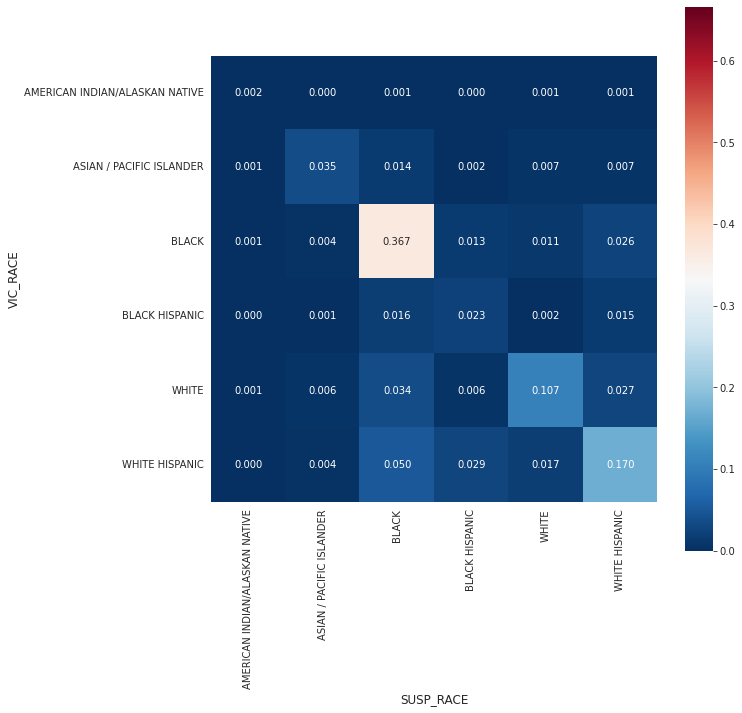

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(cross_table, cmap='RdBu_r', ax=ax,square=True,vmin=0, vmax=0.666,annot=True,fmt='.3f',)

#### 2/ Crimes per Year

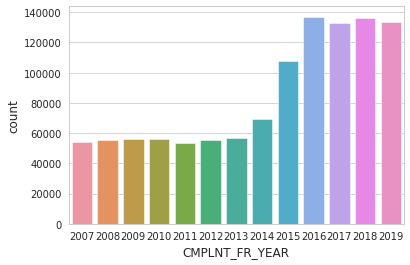

In [46]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df)

In [47]:
pd.unique(df.LAW_CAT_CD)

array(['MISDEMEANOR', 'FELONY', 'VIOLATION'], dtype=object)

#### 3/ Felonies per Year

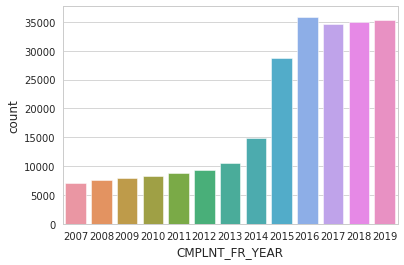

In [48]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'FELONY'])

#### 4/ Violations per Year

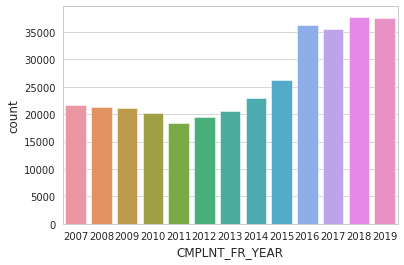

In [49]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'VIOLATION'])

#### 5/ Misdemeanors per Year

<AxesSubplot:xlabel='CMPLNT_FR_YEAR', ylabel='count'>

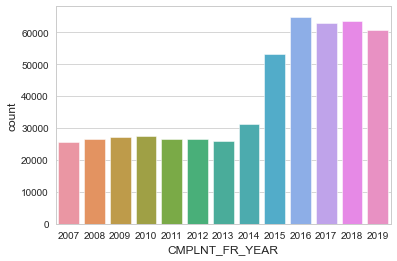

In [ ]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'MISDEMEANOR'])

#### 6/ Correlation from year 2017 (for more recent information) 

In [50]:
df = df[df['CMPLNT_FR_YEAR'] > 2017]

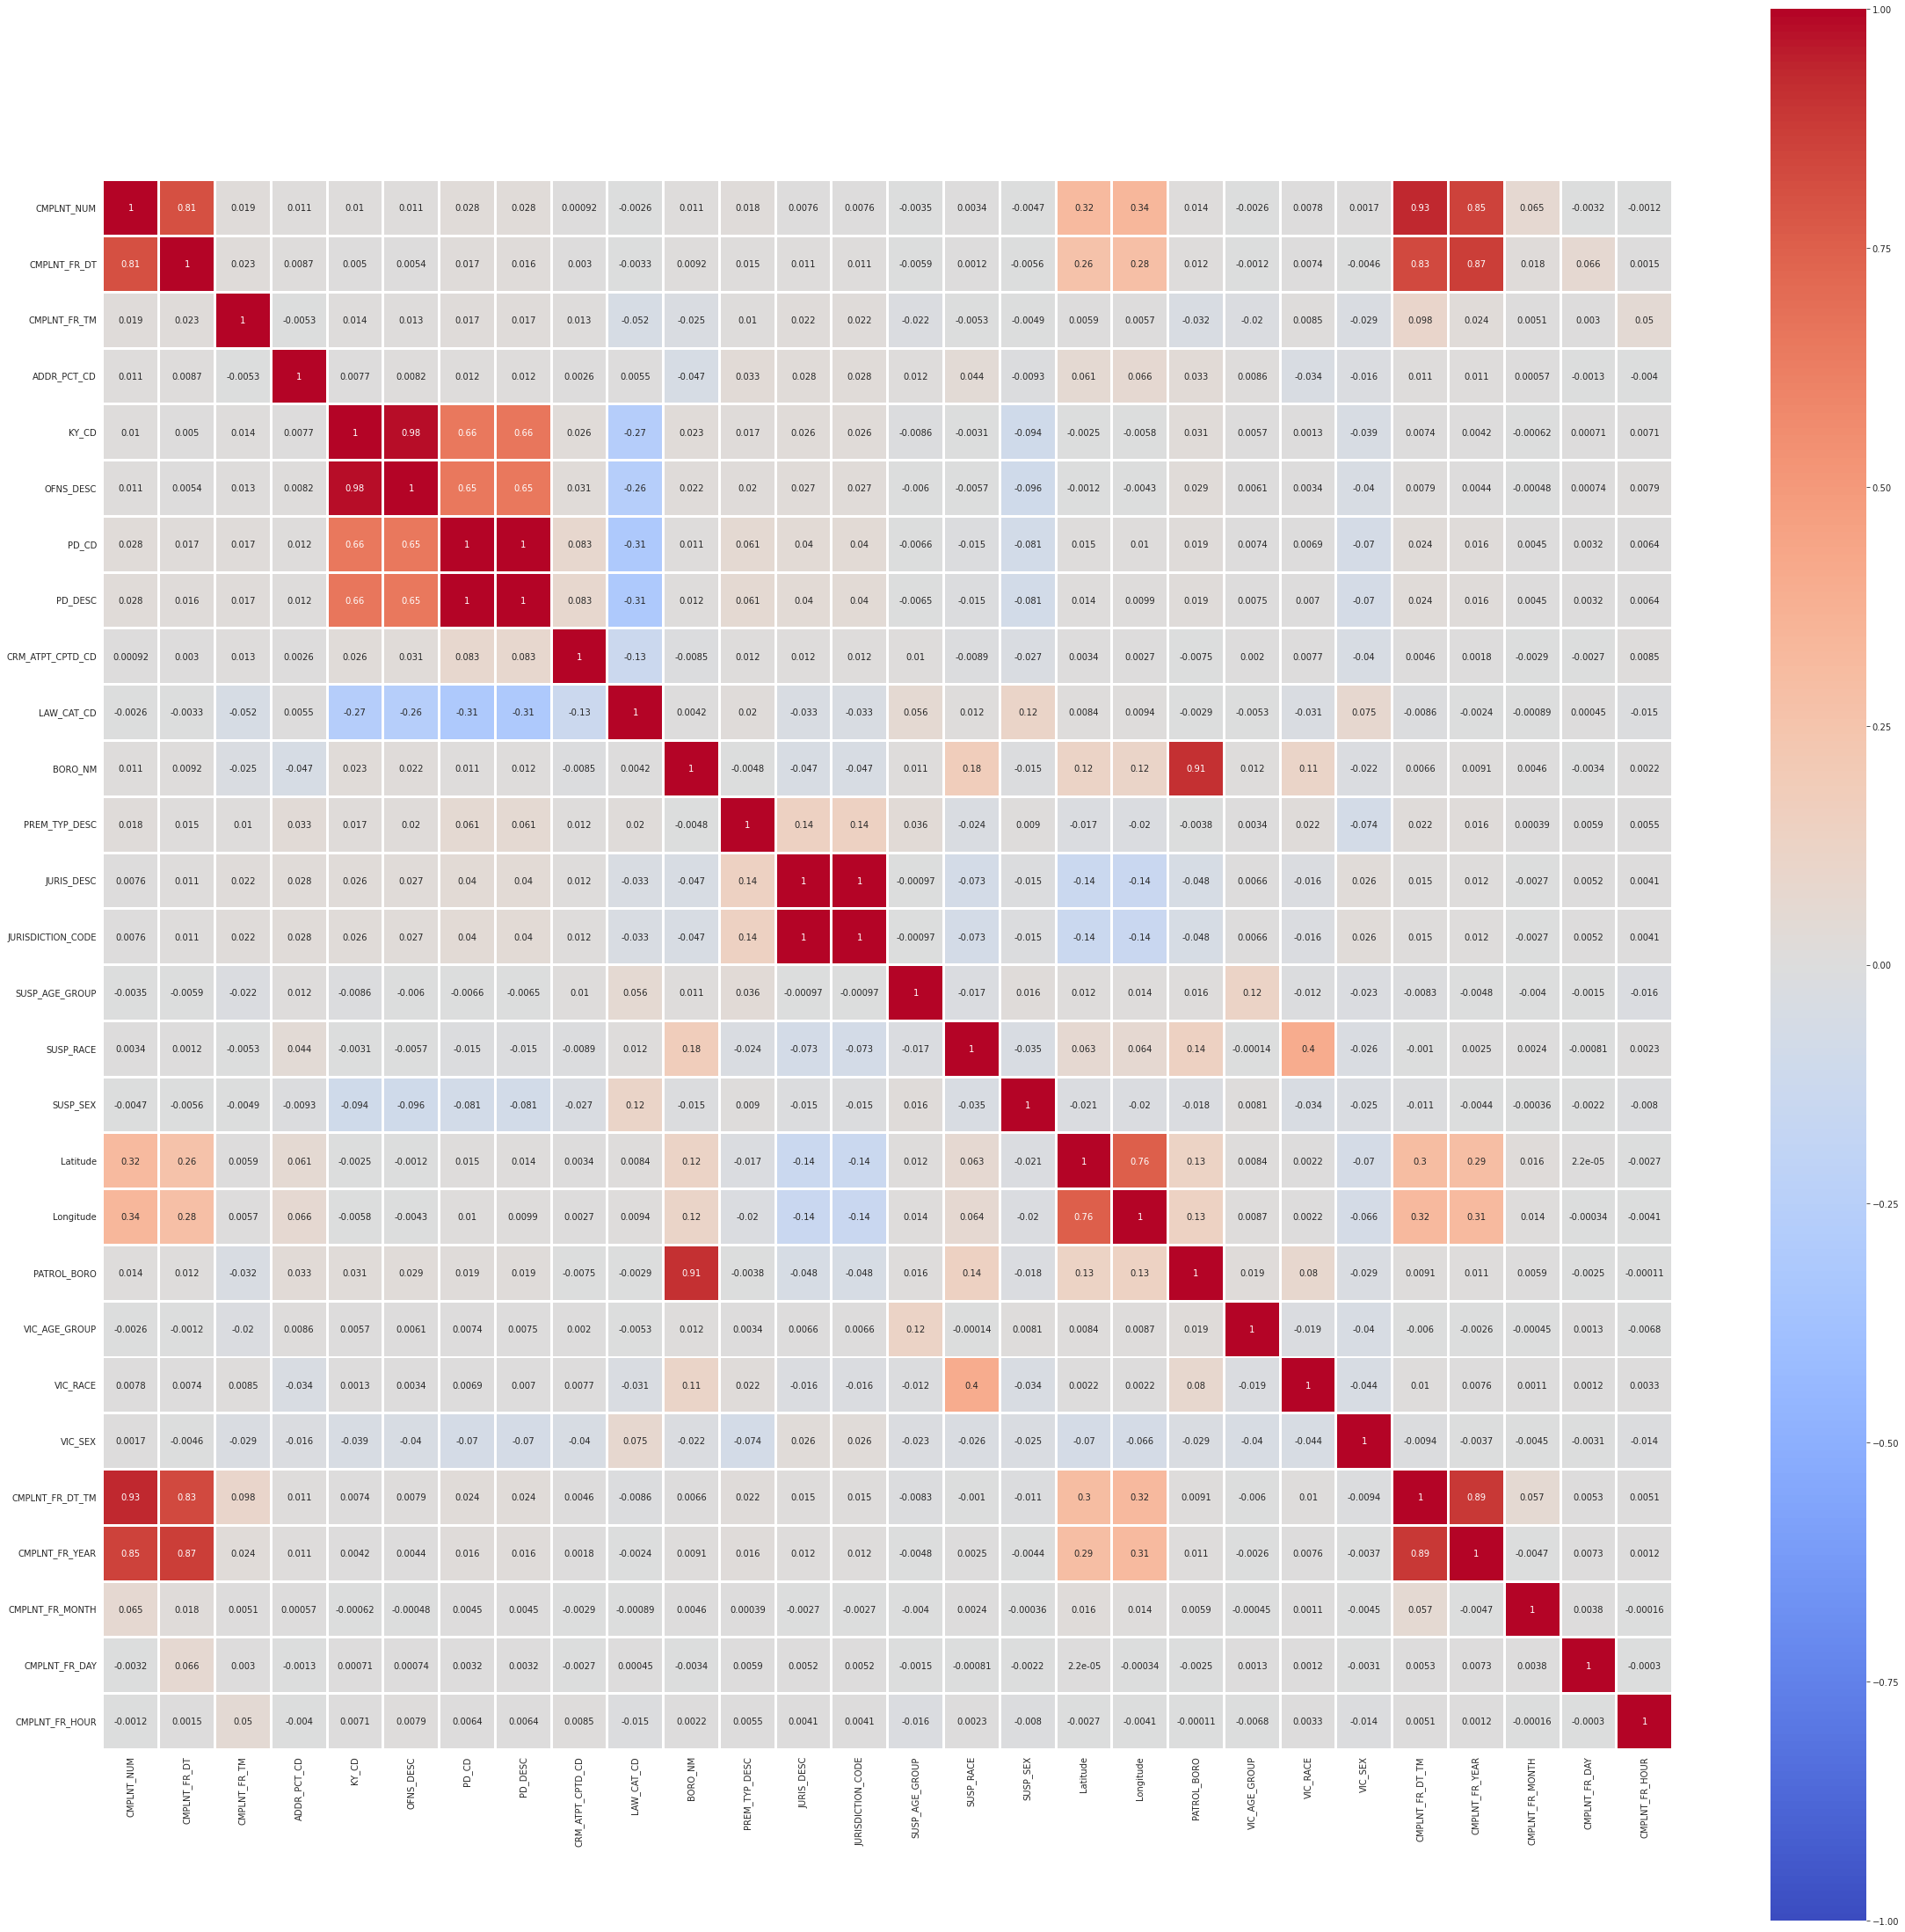

In [51]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize = (40,40))
sns_plot = sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white", annot=True,vmin=-1, vmax=1, center=0, square=True)
plt.savefig("corr.png")

#### 7/ Plotting crime rates per borough

Text(0.5, 1.0, 'Crime Rate in NYC (per Borough)')

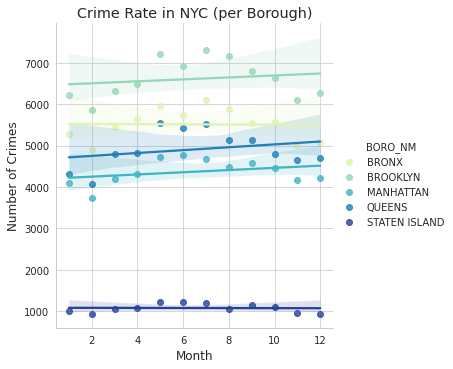

In [52]:
# plotting crime rates per borough
df_borough = df.groupby(['CMPLNT_FR_MONTH','BORO_NM'])[['CMPLNT_NUM']].count().reset_index()

g = sns.lmplot(x='CMPLNT_FR_MONTH',y='CMPLNT_NUM',data=df_borough, hue='BORO_NM', palette='YlGnBu')
g = (g.set_axis_labels("Month","Number of Crimes"));
plt.title("Crime Rate in NYC (per Borough)")


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


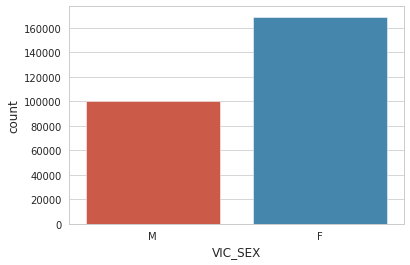

In [53]:
sns.countplot(df['VIC_SEX'])

### Data Modeling 

In [54]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'CMPLNT_FR_DT_TM', 'CMPLNT_FR_YEAR', 'CMPLNT_FR_MONTH', 'CMPLNT_FR_DAY',
       'CMPLNT_FR_HOUR'],
      dtype='object')

In [ ]:
df1 = df.copy()

In [55]:
columns_remove = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD', 
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX','CMPLNT_FR_DT_TM',
       'PATROL_BORO', 'VIC_RACE',]
df = df.drop(columns_remove, axis=1)

In [56]:
df

,KY_CD,Latitude,Longitude,VIC_AGE_GROUP,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
9244,106,40.705543,-73.942910,25-44,M,2018,10,31,21
10423,361,40.890181,-73.857472,25-44,M,2018,1,1,6
14106,104,40.887451,-73.847608,<18,F,2018,7,10,0
14799,104,40.648650,-73.950336,<18,F,2018,11,29,0
17633,578,40.768524,-73.987138,45-64,M,2018,2,21,13
...,...,...,...,...,...,...,...,...,...
4570508,578,40.728448,-73.796781,25-44,F,2018,12,31,21
4570518,578,40.786459,-73.849572,25-44,F,2018,12,17,20
4570525,578,40.743910,-73.916652,25-44,F,2018,9,21,12
4570528,361,40.736092,-73.985149,45-64,M,2018,2,25,6


In [57]:
def ky_cat(ky_cd):
    if ky_cd in [101,102,103]:
        return "killing crimes"
    elif ky_cd in [104,115,116,233,234,356,460]:
        return "sexual crimes"
    elif ky_cd in [105,107,109,110,111,112,113,231,238,340,341,342,343,358]:
        return "thift"
    elif ky_cd in [106,114,124,344]:
        return "other types of violent"
    elif ky_cd in [117,118,119,232,235,236,346,347,577]:
        return "drugs"
    elif ky_cd in [120, 121, 125, 126, 345, 345, 348, 349, 351, 352, 353, 354, 355, 357, 359, 360, 361, 362, 363, 364, 364, 364, 365, 366, 455, 571, 572, 578, 672, 675, 676, 677, 677, 678, 685, 881] :
        return "other"
df['KY_CD'] = df['KY_CD'].map(lambda x: ky_cat(x))

In [59]:
df.head()

,KY_CD,Latitude,Longitude,VIC_AGE_GROUP,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
9244,other types of violent,40.705543,-73.942910,25-44,M,2018,10,31,21
10423,other,40.890181,-73.857472,25-44,M,2018,1,1,6
14106,sexual crimes,40.887451,-73.847608,<18,F,2018,7,10,0
14799,sexual crimes,40.648650,-73.950336,<18,F,2018,11,29,0
17633,other,40.768524,-73.987138,45-64,M,2018,2,21,13


In [58]:
dum_df = pd.get_dummies(df, columns=["KY_CD","VIC_SEX"],
                        prefix=["KY_CD","VIC_SEX"] )

In [60]:
dum_df

,Latitude,Longitude,VIC_AGE_GROUP,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR,KY_CD_drugs,KY_CD_killing crimes,KY_CD_other,KY_CD_other types of violent,KY_CD_sexual crimes,KY_CD_thift,VIC_SEX_F,VIC_SEX_M
9244,40.705543,-73.942910,25-44,2018,10,31,21,0,0,0,1,0,0,0,1
10423,40.890181,-73.857472,25-44,2018,1,1,6,0,0,1,0,0,0,0,1
14106,40.887451,-73.847608,<18,2018,7,10,0,0,0,0,0,1,0,1,0
14799,40.648650,-73.950336,<18,2018,11,29,0,0,0,0,0,1,0,1,0
17633,40.768524,-73.987138,45-64,2018,2,21,13,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570508,40.728448,-73.796781,25-44,2018,12,31,21,0,0,1,0,0,0,1,0
4570518,40.786459,-73.849572,25-44,2018,12,17,20,0,0,1,0,0,0,1,0
4570525,40.743910,-73.916652,25-44,2018,9,21,12,0,0,1,0,0,0,1,0
4570528,40.736092,-73.985149,45-64,2018,2,25,6,0,0,1,0,0,0,0,1


In [61]:
dum_df['VIC_AGE_GROUP'].nunique()

28

In [62]:
dum_df['VIC_AGE_GROUP'] = dum_df['VIC_AGE_GROUP'].apply(lambda x: 0 if x=='<=24' else (1 if x=='25-64' else 2))
dum_df['VIC_AGE_GROUP']

9244       2
10423      2
14106      2
14799      2
17633      2
          ..
4570508    2
4570518    2
4570525    2
4570528    2
4570533    2
Name: VIC_AGE_GROUP, Length: 269794, dtype: int64

In [63]:
dum_df

,Latitude,Longitude,VIC_AGE_GROUP,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR,KY_CD_drugs,KY_CD_killing crimes,KY_CD_other,KY_CD_other types of violent,KY_CD_sexual crimes,KY_CD_thift,VIC_SEX_F,VIC_SEX_M
9244,40.705543,-73.942910,2,2018,10,31,21,0,0,0,1,0,0,0,1
10423,40.890181,-73.857472,2,2018,1,1,6,0,0,1,0,0,0,0,1
14106,40.887451,-73.847608,2,2018,7,10,0,0,0,0,0,1,0,1,0
14799,40.648650,-73.950336,2,2018,11,29,0,0,0,0,0,1,0,1,0
17633,40.768524,-73.987138,2,2018,2,21,13,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570508,40.728448,-73.796781,2,2018,12,31,21,0,0,1,0,0,0,1,0
4570518,40.786459,-73.849572,2,2018,12,17,20,0,0,1,0,0,0,1,0
4570525,40.743910,-73.916652,2,2018,9,21,12,0,0,1,0,0,0,1,0
4570528,40.736092,-73.985149,2,2018,2,25,6,0,0,1,0,0,0,0,1


In [64]:
dum_df.columns

Index(['Latitude', 'Longitude', 'VIC_AGE_GROUP', 'CMPLNT_FR_YEAR',
       'CMPLNT_FR_MONTH', 'CMPLNT_FR_DAY', 'CMPLNT_FR_HOUR', 'KY_CD_drugs',
       'KY_CD_killing crimes', 'KY_CD_other', 'KY_CD_other types of violent',
       'KY_CD_sexual crimes', 'KY_CD_thift', 'VIC_SEX_F', 'VIC_SEX_M'],
      dtype='object')

In [65]:
df2=dum_df.copy()

In [66]:
df2.head()

,Latitude,Longitude,VIC_AGE_GROUP,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR,KY_CD_drugs,KY_CD_killing crimes,KY_CD_other,KY_CD_other types of violent,KY_CD_sexual crimes,KY_CD_thift,VIC_SEX_F,VIC_SEX_M
9244,40.705543,-73.942910,2,2018,10,31,21,0,0,0,1,0,0,0,1
10423,40.890181,-73.857472,2,2018,1,1,6,0,0,1,0,0,0,0,1
14106,40.887451,-73.847608,2,2018,7,10,0,0,0,0,0,1,0,1,0
14799,40.648650,-73.950336,2,2018,11,29,0,0,0,0,0,1,0,1,0
17633,40.768524,-73.987138,2,2018,2,21,13,0,0,1,0,0,0,0,1


In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269794 entries, 9244 to 4570533
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Latitude                      269794 non-null  float64
 1   Longitude                     269794 non-null  float64
 2   VIC_AGE_GROUP                 269794 non-null  int64  
 3   CMPLNT_FR_YEAR                269794 non-null  int64  
 4   CMPLNT_FR_MONTH               269794 non-null  int64  
 5   CMPLNT_FR_DAY                 269794 non-null  int64  
 6   CMPLNT_FR_HOUR                269794 non-null  int64  
 7   KY_CD_drugs                   269794 non-null  uint8  
 8   KY_CD_killing crimes          269794 non-null  uint8  
 9   KY_CD_other                   269794 non-null  uint8  
 10  KY_CD_other types of violent  269794 non-null  uint8  
 11  KY_CD_sexual crimes           269794 non-null  uint8  
 12  KY_CD_thift                   269794 non

In [68]:
# Get the feature vector
X = df2.drop(['KY_CD_killing crimes', 'KY_CD_other', 'KY_CD_other types of violent',
       'KY_CD_sexual crimes', 'KY_CD_thift','KY_CD_drugs'], axis = 1)

# Get the target vector
y = df2[['KY_CD_killing crimes', 'KY_CD_other', 'KY_CD_other types of violent',
       'KY_CD_sexual crimes', 'KY_CD_thift','KY_CD_drugs']]

print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (269794, 9)
y shape: (269794, 6)


In [69]:
import tensorflow

In [70]:
from tensorflow.keras.layers import Dense, Dropout

In [71]:
from tensorflow.keras.preprocessing import sequence

In [72]:
from tensorflow.keras.models import Sequential

In [73]:
from tensorflow.keras.layers import Dense, BatchNormalization

In [74]:
LR = 0.0001

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train.shape

(215835, 9)

In [81]:
df

,KY_CD,Latitude,Longitude,VIC_AGE_GROUP,VIC_SEX,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,CMPLNT_FR_HOUR
9244,other types of violent,40.705543,-73.942910,25-44,M,2018,10,31,21
10423,other,40.890181,-73.857472,25-44,M,2018,1,1,6
14106,sexual crimes,40.887451,-73.847608,<18,F,2018,7,10,0
14799,sexual crimes,40.648650,-73.950336,<18,F,2018,11,29,0
17633,other,40.768524,-73.987138,45-64,M,2018,2,21,13
...,...,...,...,...,...,...,...,...,...
4570508,other,40.728448,-73.796781,25-44,F,2018,12,31,21
4570518,other,40.786459,-73.849572,25-44,F,2018,12,17,20
4570525,other,40.743910,-73.916652,25-44,F,2018,9,21,12
4570528,other,40.736092,-73.985149,45-64,M,2018,2,25,6


In [84]:
# Create model
model = Sequential()
model.add(Dense(500, input_dim=9, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model to training data
model.fit(X_train, y_train, epochs=50, batch_size=256)

Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 3.0979 - accuracy: 0.4241
Epoch 2/50
844/844 [==============================] - 3s 3ms/step - loss: 1.1891 - accuracy: 0.4729
Epoch 3/50
844/844 [==============================] - 3s 3ms/step - loss: 1.1371 - accuracy: 0.4861
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 1.1215 - accuracy: 0.4987
Epoch 5/50
844/844 [==============================] - 3s 3ms/step - loss: 1.1073 - accuracy: 0.5083
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 1.1020 - accuracy: 0.5082
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 1.0988 - accuracy: 0.5081
Epoch 8/50
844/844 [==============================] - 3s 3ms/step - loss: 1.0982 - accuracy: 0.5071
Epoch 9/50
844/844 [==============================] - 3s 3ms/step - loss: 1.0961 - accuracy: 0.5065
Epoch 10/50
844/844 [==============================] - 3s 3ms/step - loss: 1.0941 - accuracy: 0.5074

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 500)               5000      
                                                                 
 dense_16 (Dense)            (None, 500)               250500    
                                                                 
 dense_17 (Dense)            (None, 200)               100200    
                                                                 
 dense_18 (Dense)            (None, 64)                12864     
                                                                 
 dense_19 (Dense)            (None, 6)                 390       
                                                                 
Total params: 368,954
Trainable params: 368,954
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Evaluate model on test data
scores = model.evaluate(X_test, y_test)
print("\n%s: %.14f%%" % (model.metrics_names[1], scores[1]*100))

1687/1687 [==============================] - 4s 3ms/step - loss: 1.0790 - accuracy: 0.5175

accuracy: 51.74669623374939%


### Save the model

In [89]:
model.save('model2.h5')